In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [3]:
df_cust = pd.read_csv('Datasets/customers.csv')
df_cs = pd.read_csv('Datasets/credit_profiles.csv')
df_trans = pd.read_csv('Datasets/transactions.csv')

print(df_cust.shape)
print(df_cs.shape)
print(df_trans.shape)

(1000, 8)
(1004, 6)
(500000, 7)


In [4]:
df_cust.describe()



,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [5]:
df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [6]:
df_trans.describe()


,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [182]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [9]:
df_cust[df_cust.annual_income.isna()].shape

(50, 8)

In [10]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [11]:
df_cust[df_cust.annual_income.isna()].head(4)
df_cust.shape

(1000, 8)

In [185]:
df_cust[df_cust.occupation == 'Artist'].annual_income.median()


45794.0

In [186]:
df_cust[df_cust.occupation == 'Freelancer'].annual_income.median()

46759.0

In [187]:
df_cust[df_cust.occupation == 'Data Scientist'].annual_income.median()

135759.0

In [188]:
df_cust.groupby("occupation")["annual_income"].median()


occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [13]:
occupation_wise_inc_median = df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [190]:
occupation_wise_inc_median["Artist"]

np.float64(45794.0)

In [191]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_inc_median[row['occupation']]
    else:
        return row["annual_income"]

In [192]:
get_median_val({"cust_id": 3245, "annual_income": 678})

678

In [193]:
df_cust["annual_income"] = df_cust.apply(get_median_val,axis=1)
df_cust.shape

(1000, 8)

In [194]:
df_cust.iloc[[14,22,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,45794.0,Married
22,23,Swara Pawar,Male,19,City,Freelancer,36863.0,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,46759.0,Single


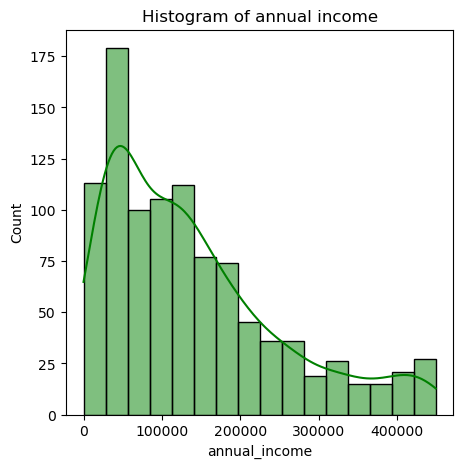

In [195]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"],kde=True, color='green', label='Data')
plt.title("Histogram of annual income")
plt.show()

In [196]:
# Data Cleaning : Treat Outliers (Annual Income)
# keep it simple 
# as manager told keep : less than 100 

for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        df_cust.at[index,"annual_income"]


df_cust.at[4,"gender"]


'Male'

In [197]:
for index, row in df_cust.iterrows():
    if row["annual_income"] < 100:
        df_cust.at[index, "annual_income"] = occupation_wise_inc_median[row["occupation"]]

In [198]:
df_cust.loc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,261191.5,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,58017.0,Married


In [199]:
avg_income_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

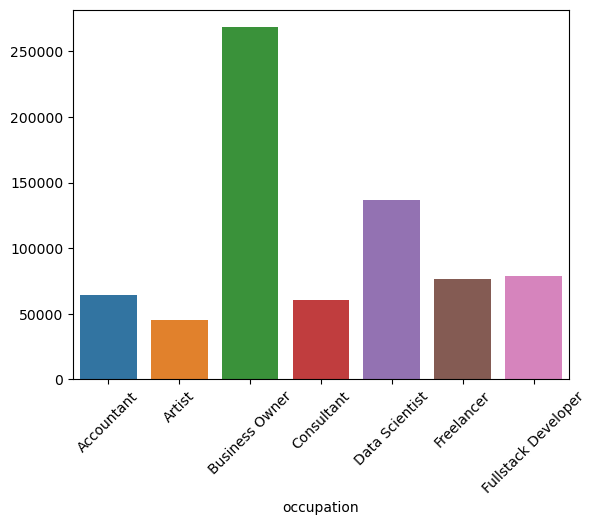

In [200]:
sns.barplot(x = avg_income_per_occupation.index ,y=avg_income_per_occupation.values,palette="tab10")
plt.xticks(rotation=45)
plt.show()

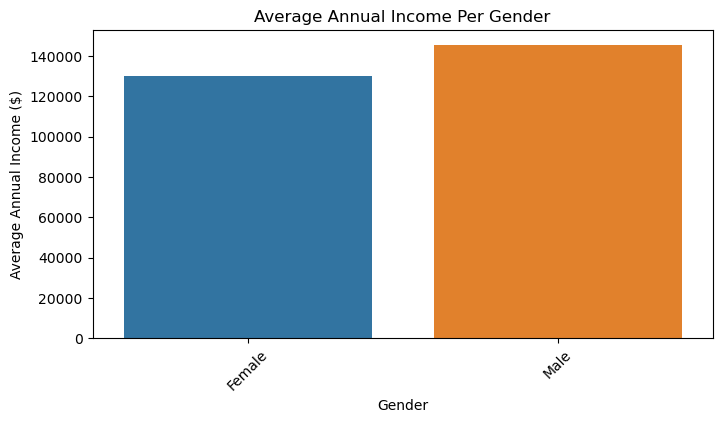

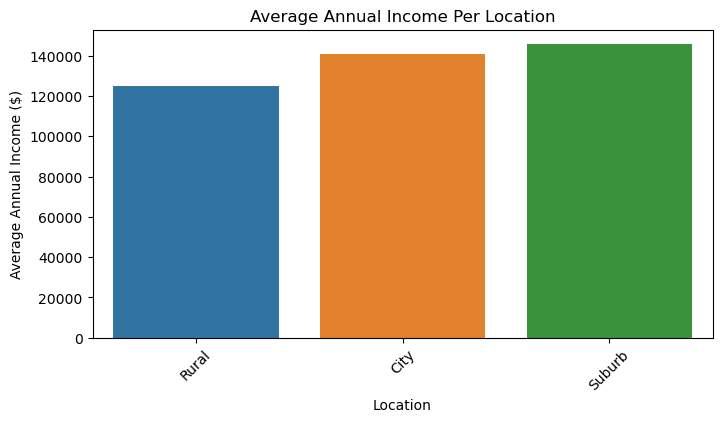

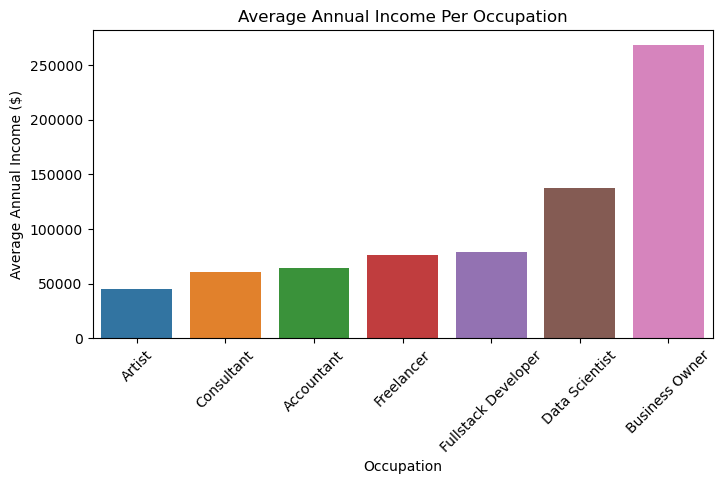

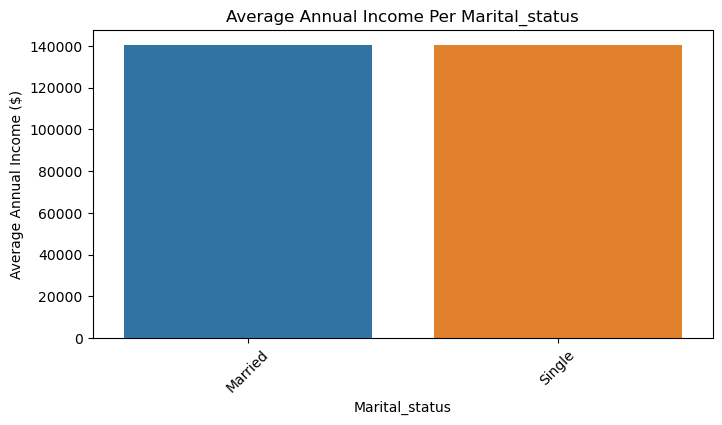

In [201]:
categorical_columns = ['gender','location','occupation','marital_status']

for col in categorical_columns:
    plt.figure(figsize=(8,4))
    avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values,palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f"Average Annual Income Per {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Average Annual Income ($)")
    plt.show()


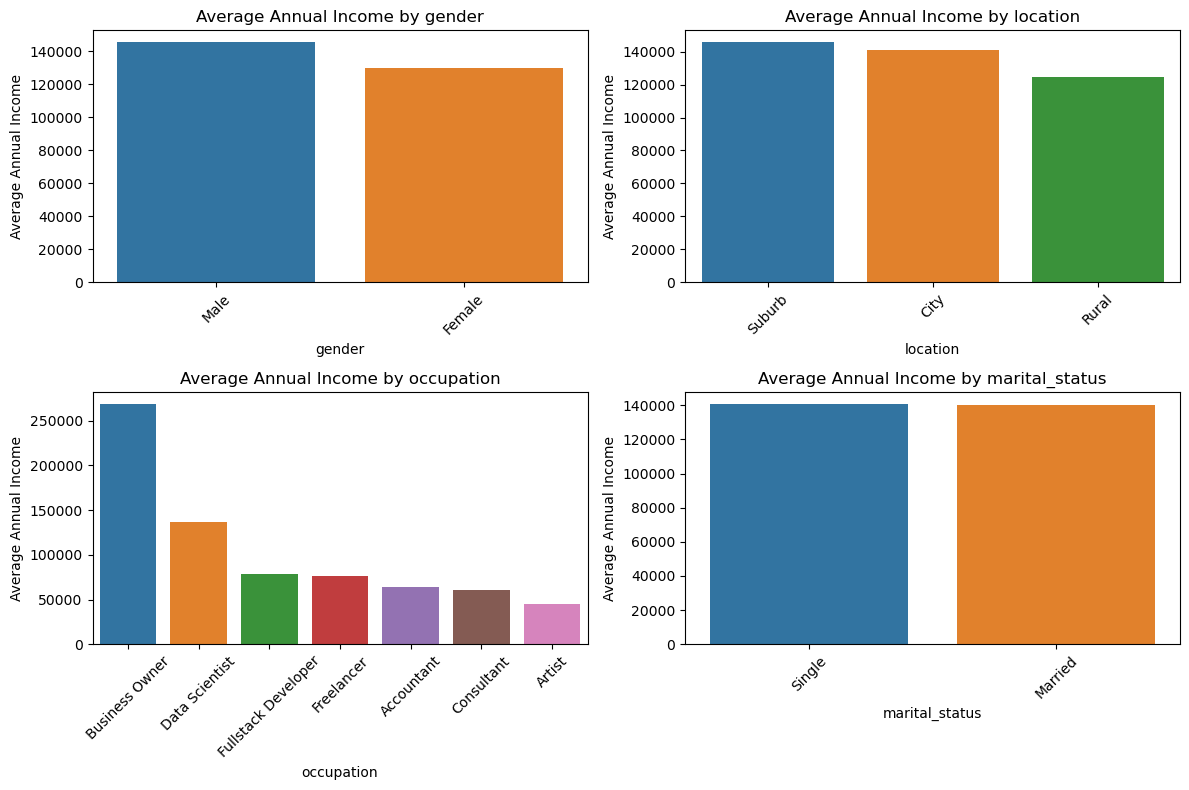

In [202]:
cat_cols = ["gender", "location","occupation","marital_status"]

num_rows = 2

fig, axes = plt.subplots(num_rows, 2 , figsize= (12, 4 * num_rows ))

axes = axes.flatten()

for i , cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()

    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income',ascending=False)

    sns.barplot(x=cat_col, y='annual_income',data=sorted_data,ci=None, ax=axes[i],palette='tab10')

    axes[i].set_title(f"Average Annual Income by {cat_col}")
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel(f"Average Annual Income")

    # rotate x axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=45)

for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [203]:
iter = df_cust.groupby('occupation').age.mean()


In [204]:
for index, row in df_cust.iterrows():
    if pd.isnull(row["age"]):
        df_cust.at[index, "age"] = iter[row["occupation"]]

In [205]:
df_cust.isna().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [206]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married
...,...,...,...,...,...,...,...,...
995,996,Advait Rana,Female,26,City,Freelancer,46759.0,Married
996,997,Sia Chatterjee,Male,55,City,Business Owner,290061.0,Single
997,998,Amara Tiwari,Male,29,City,Fullstack Developer,139141.0,Married
998,999,Aanya Malhotra,Female,47,City,Business Owner,261191.5,Married


In [207]:
bin_edges = [ 17,25,48,65]
bin_labels = ["18-25", "26-48", "49-65"]

# Use the cut function to bin and label the age column
df_cust['age_group'] = pd.cut(df_cust['age'], bins = bin_edges, labels=bin_labels,include_lowest=True)
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married,NaN
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,26-48


In [208]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married,NaN
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,26-48


In [209]:
age_group_counts = df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

age_group
26-48    56.836735
18-25    24.489796
49-65    18.673469
Name: proportion, dtype: float64

In [210]:
type(age_group_counts)

pandas.core.series.Series

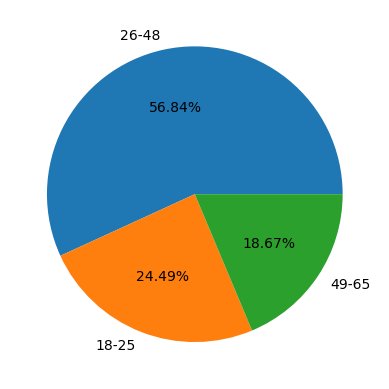

In [211]:
plt.pie(
        age_group_counts, 
        labels=age_group_counts.index,autopct='%1.2f%%')
plt.show()

In [212]:
df_cust.groupby(['location','gender']).size().unstack()

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [213]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [214]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [215]:
customer_location_gender = df_cust.groupby(["location","gender"]).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


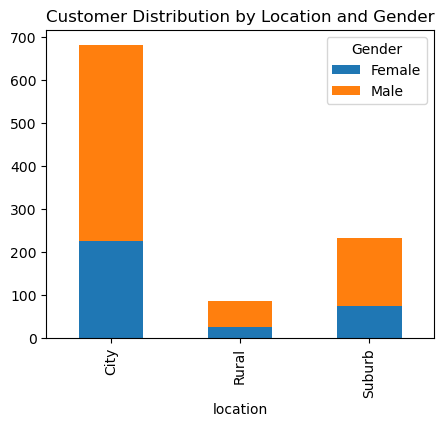

In [216]:
customer_location_gender.plot(kind='bar',stacked=True,figsize=(5,4))
plt.legend(title="Gender")
plt.title('Customer Distribution by Location and Gender')
plt.show()

In [217]:
# Data cleaning Credit Score Table - Part 1
df_cs.shape

(1004, 6)

In [218]:
df_cust.shape

(1000, 9)

In [219]:
df_cs['cust_id'].nunique() # count of unique values

1000

In [220]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [221]:
df_cs_clean_1 = df_cs.drop_duplicates(
                    subset='cust_id',
                    keep="last"
                    )
df_cs_clean_1.shape

(1000, 6)

In [222]:
df_cs_clean_1[df_cs_clean_1['cust_id'].duplicated(keep=False)]


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [223]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [224]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


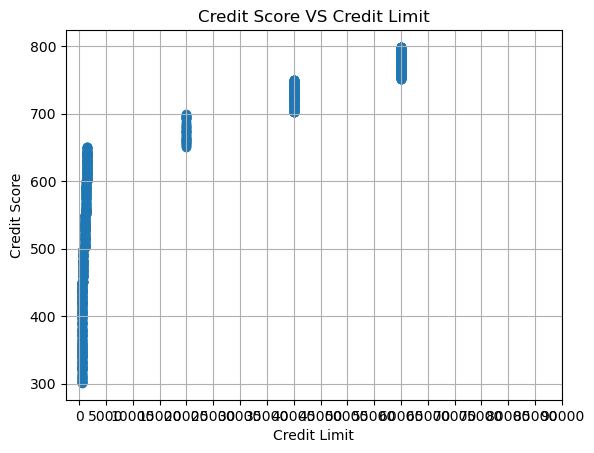

In [225]:
plt.scatter(df_cs_clean_1.credit_limit,df_cs_clean_1.credit_score)


plt.title("Credit Score VS Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")

# adjust the y axis bin interval to 1000
plt.xticks(range(0,90001,5000))
plt.grid(True)

plt.show()

In [226]:
bin_ranges = [300, 450 , 500, 550, 600, 650, 700, 750 ,800]
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

df_cs_clean_1["credit_score_range"] = pd.cut(
    df_cs_clean_1["credit_score"],
    bins=bin_ranges,
    labels=bin_labels,
    include_lowest=True,
    right=False
)



In [227]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [228]:
df_cs_clean_1[df_cs_clean_1.credit_score_range == "700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [229]:
mode_df = df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index()

mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [230]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
126,127,522,0.287678,204.0,4.0,NaN,500-549
342,343,733,0.646581,20948.0,2.0,NaN,700-749
729,726,737,0.136048,205404.0,4.0,NaN,700-749


In [231]:
df_cs_clean_2 = pd.merge(df_cs_clean_1, mode_df, on="credit_score_range",suffixes=("","_mode"))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
32,33,516,0.284128,253.0,0.0,1000.0,500-549,1000.0
532,533,519,0.231239,195.0,3.0,1000.0,500-549,1000.0
471,472,778,0.262706,12502.0,1.0,NaN,750-799,60000.0


In [232]:
df_cs_clean_2['credit_limit'].fillna(df_cs_clean_2["credit_limit_mode"],inplace=True)
df_cs_clean_2['credit_limit']

0      40000.0
1       1250.0
2       1000.0
3       1000.0
4      40000.0
        ...   
995     1250.0
996    60000.0
997     1000.0
998    40000.0
999    60000.0
Name: credit_limit, Length: 1000, dtype: float64

In [233]:
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3["credit_limit"].fillna(df_cs_clean_3['credit_limit_mode'],inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [234]:
df_cs_clean_3[df_cs_clean_3.credit_limit.isnull()].shape

(0, 8)

In [235]:
df_cs_clean_3.isnull().sum()

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [236]:
df_cs_clean_3.loc[[336,644]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
336,337,448,0.656279,197.0,4.0,500.0,300-449,500.0
644,645,734,0.876833,19568.0,3.0,40000.0,700-749,40000.0


In [237]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [238]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married,NaN
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,26-48


In [239]:
# Bivariate Analysis
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married,NaN
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,26-48


In [240]:
df_merged = df_cust.merge(df_cs_clean_3, on="cust_id",how="inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married,NaN,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [241]:
df_merged[["credit_score","credit_limit"]].corr()

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [242]:
numerical_cols = ["credit_score","credit_utilisation", "outstanding_debt", "credit_limit","annual_income",]
correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income
credit_score,1.000000,-0.070445,0.306026,0.847952,0.575751
credit_utilisation,-0.070445,1.000000,0.046540,-0.080493,-0.086368
outstanding_debt,0.306026,0.046540,1.000000,0.365307,0.276196
credit_limit,0.847952,-0.080493,0.365307,1.000000,0.684775
annual_income,0.575751,-0.086368,0.276196,0.684775,1.000000


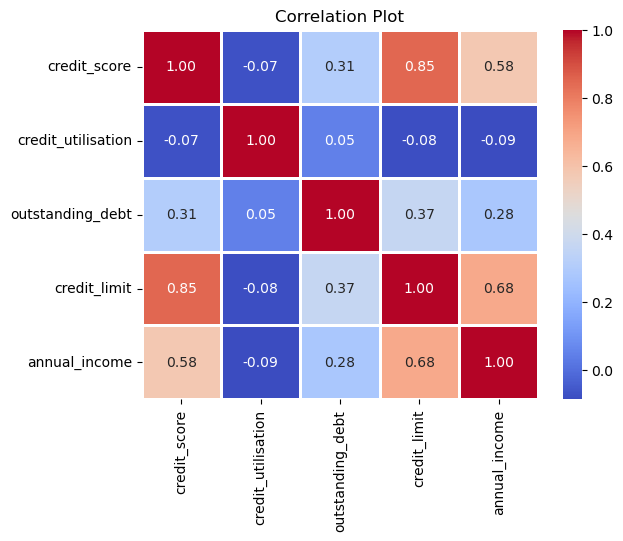

In [243]:
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f",cmap='coolwarm',linewidth=0.9)
plt.title("Correlation Plot")
plt.show()

In [244]:
# cleaning on transaction data
print(df_trans)
df_trans.head()


        tran_id  cust_id   tran_date  tran_amount  platform  \
0             1      705  2023-01-01           63  Flipkart   
1             2      385  2023-01-01           99   Alibaba   
2             3      924  2023-01-01          471   Shopify   
3             4      797  2023-01-01           33   Shopify   
4             5      482  2023-01-01           68    Amazon   
...         ...      ...         ...          ...       ...   
499995   499996      791  2023-09-05           43    Amazon   
499996   499997      569  2023-09-05        53022    Meesho   
499997   499998       57  2023-09-05          224       NaN   
499998   499999      629  2023-09-05          538  Flipkart   
499999   500000      392  2023-09-05          346    Amazon   

          product_category payment_type  
0              Electronics      Phonepe  
1        Fashion & Apparel  Credit Card  
2                   Sports      Phonepe  
3        Fashion & Apparel         Gpay  
4        Fashion & Apparel  Net B

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


Try both approach dropping Na values 
and replacing with mode value preserving the other distribution.

In [245]:
# df_trans = df_trans.dropna(subset=["platform"])
# df_trans

In [246]:
df_trans.columns

Index(['tran_id', 'cust_id', 'tran_date', 'tran_amount', 'platform',
       'product_category', 'payment_type'],
      dtype='object')

In [247]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [248]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='platform'>

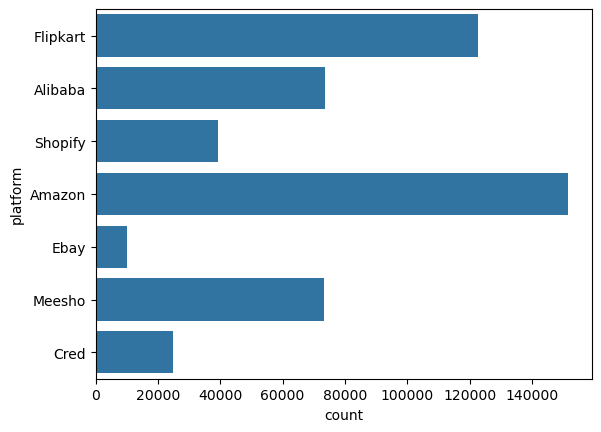

In [249]:
sns.countplot(y="platform",data=df_trans)

<Axes: xlabel='count', ylabel='product_category'>

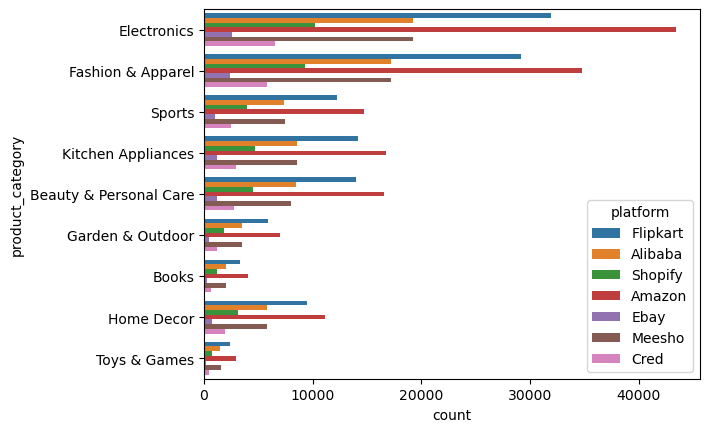

In [250]:
sns.countplot(y="product_category", hue="platform", data=df_trans)

In [251]:
df_trans.platform.mode()[0]

'Amazon'

In [252]:
#2 fill with na try later
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

In [253]:
df_trans.describe()

# B Requirement : tran amount cant be 

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [254]:
# peter confusion : IQR or STD DEV?
df_trans_zero = df_trans[df_trans.tran_amount==0]
df_trans.shape

(500000, 7)

In [255]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [256]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [257]:
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [ ]:
# df_trans_zero.payment.value_counts()

AttributeError: 'DataFrame' object has no attribute 'payment'

In [259]:
df_trans_zero[["platform", "product_category" ,"payment_type" ]].value_counts().unstack()


,payment_type,Credit Card
platform,product_category,
Amazon,Electronics,4734


In [260]:
df_trans_1 = df_trans[ (df_trans.platform =='Amazon') & (df_trans.product_category == 'Electronics')& (df_trans.payment_type == 'Credit Card')]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [ ]:
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [261]:
median_to_replace = df_trans[df_trans.tran_amount > 0].tran_amount.median()
median_to_replace

143.0

In [262]:
df_trans["tran_amount"].replace(0, median_to_replace, inplace=True)

In [263]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3226.561254
std,144337.711634,288.641924,13098.416709
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,143.000000
75%,375000.250000,752.000000,397.000000
max,500000.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

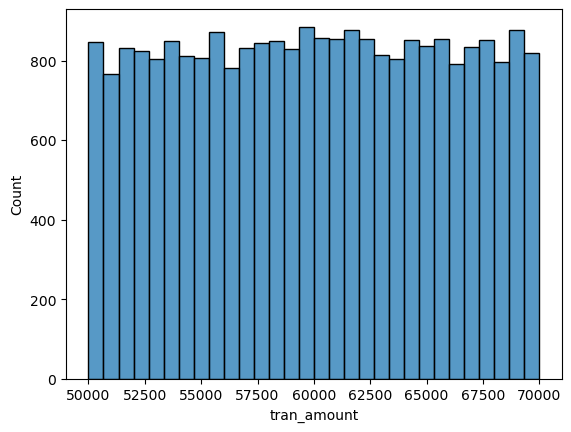

In [264]:
sns.histplot(df_trans[df_trans.tran_amount > 10000].tran_amount,bins=30)

In [265]:
# transaction will be more skewed to median or mean

Q1, Q3 = df_trans["tran_amount"].quantile([0.25,0.75])

IQR = Q3 - Q1

lower, upper = Q1 - 2*IQR , Q3 - 2*IQR
print(lower, upper)

-596.0 -265.0


In [268]:
df_trans_outlier = df_trans[df_trans.tran_amount > upper]
df_trans_outlier

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay
